# # Exploratory Data Analysis - Credit Card Fraud Data

# ## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Credit Card Data EDA - Setup Complete")

# %%
# Load the credit card dataset
creditcard_data = pd.read_csv('data/raw/creditcard.csv')

print(f"Credit Card Data Shape: {creditcard_data.shape}")

# Display basic information
print("\nCredit Card Data Columns:")
print(creditcard_data.columns.tolist())

print("\nFirst 5 rows:")
display(creditcard_data.head())

print("\nData Types:")
print(creditcard_data.dtypes)

Credit Card Data EDA - Setup Complete
Credit Card Data Shape: (284807, 31)

Credit Card Data Columns:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0



Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


# ## 2. Data Quality Check

In [2]:
# Check for missing values
missing_values = creditcard_data.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])
print(f"\nTotal missing values: {missing_values.sum()}")

# Check for duplicates
duplicates = creditcard_data.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")
if duplicates > 0:
    creditcard_data = creditcard_data.drop_duplicates()
    print(f"Removed {duplicates} duplicates")
    print(f"New shape: {creditcard_data.shape}")

# Check data ranges
print("\nData Range Check:")
print(f"Time: [{creditcard_data['Time'].min()}, {creditcard_data['Time'].max()}]")
print(f"Amount: [${creditcard_data['Amount'].min():.2f}, ${creditcard_data['Amount'].max():.2f}]")

Missing Values:
Series([], dtype: int64)

Total missing values: 0

Duplicate rows: 1081
Removed 1081 duplicates
New shape: (283726, 31)

Data Range Check:
Time: [0.0, 172792.0]
Amount: [$0.00, $25691.16]


# ## 3. Class Distribution Analysis

CLASS DISTRIBUTION ANALYSIS - CREDIT CARD


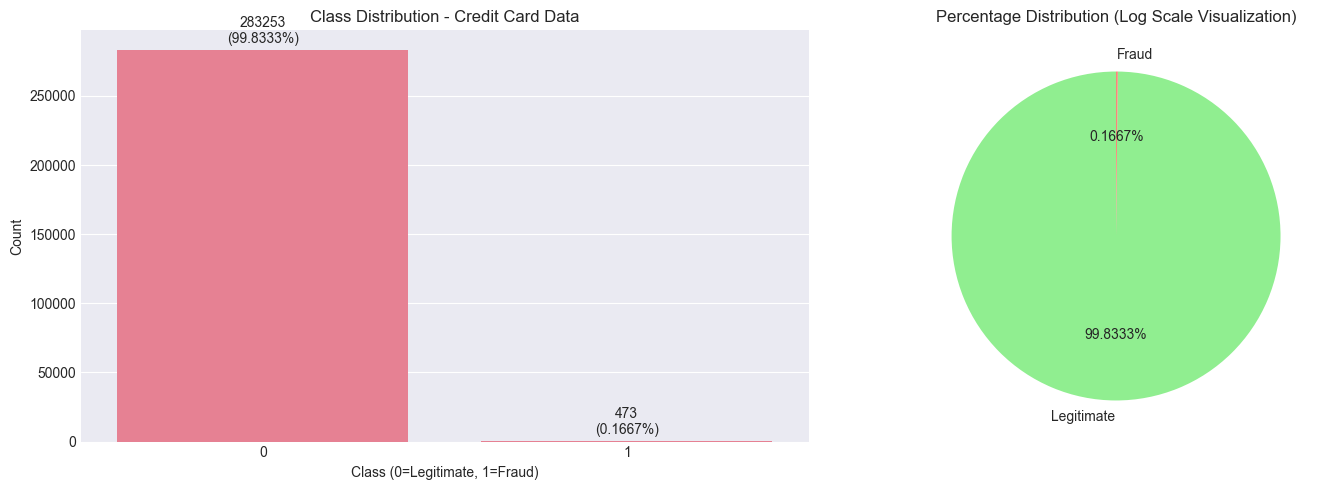

Legitimate transactions: 283253 (99.8333%)
Fraudulent transactions: 473 (0.1667%)
Imbalance ratio (legitimate:fraud): 599:1
Fraud rate: 0.1667%


In [4]:
def plot_class_distribution_cc(data):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Count plot
    class_counts = data['Class'].value_counts()
    sns.barplot(x=class_counts.index, y=class_counts.values, ax=axes[0])
    axes[0].set_title('Class Distribution - Credit Card Data')
    axes[0].set_xlabel('Class (0=Legitimate, 1=Fraud)')
    axes[0].set_ylabel('Count')
    
    # Add percentage labels
    total = len(data)
    for i, v in enumerate(class_counts.values):
        axes[0].text(i, v + total*0.01, f'{v}\n({v/total*100:.4f}%)', 
                    ha='center', va='bottom')
    
    # Pie chart (log scale for better visualization)
    axes[1].pie(class_counts.values, labels=['Legitimate', 'Fraud'], 
               autopct='%1.4f%%', startangle=90, colors=['lightgreen', 'salmon'])
    axes[1].set_title('Percentage Distribution (Log Scale Visualization)')
    
    plt.tight_layout()
    plt.savefig('plots/class_distribution_creditcard.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print statistics
    fraud_ratio = class_counts[1] / class_counts[0]
    print(f"Legitimate transactions: {class_counts[0]} ({class_counts[0]/total*100:.4f}%)")
    print(f"Fraudulent transactions: {class_counts[1]} ({class_counts[1]/total*100:.4f}%)")
    print(f"Imbalance ratio (legitimate:fraud): {1/fraud_ratio:.0f}:1")
    print(f"Fraud rate: {class_counts[1]/total*100:.4f}%")
    
    return class_counts

print("="*80)
print("CLASS DISTRIBUTION ANALYSIS - CREDIT CARD")
print("="*80)
cc_class_counts = plot_class_distribution_cc(creditcard_data)

# ## 4. Univariate Analysis

UNIVARIATE ANALYSIS - CREDIT CARD


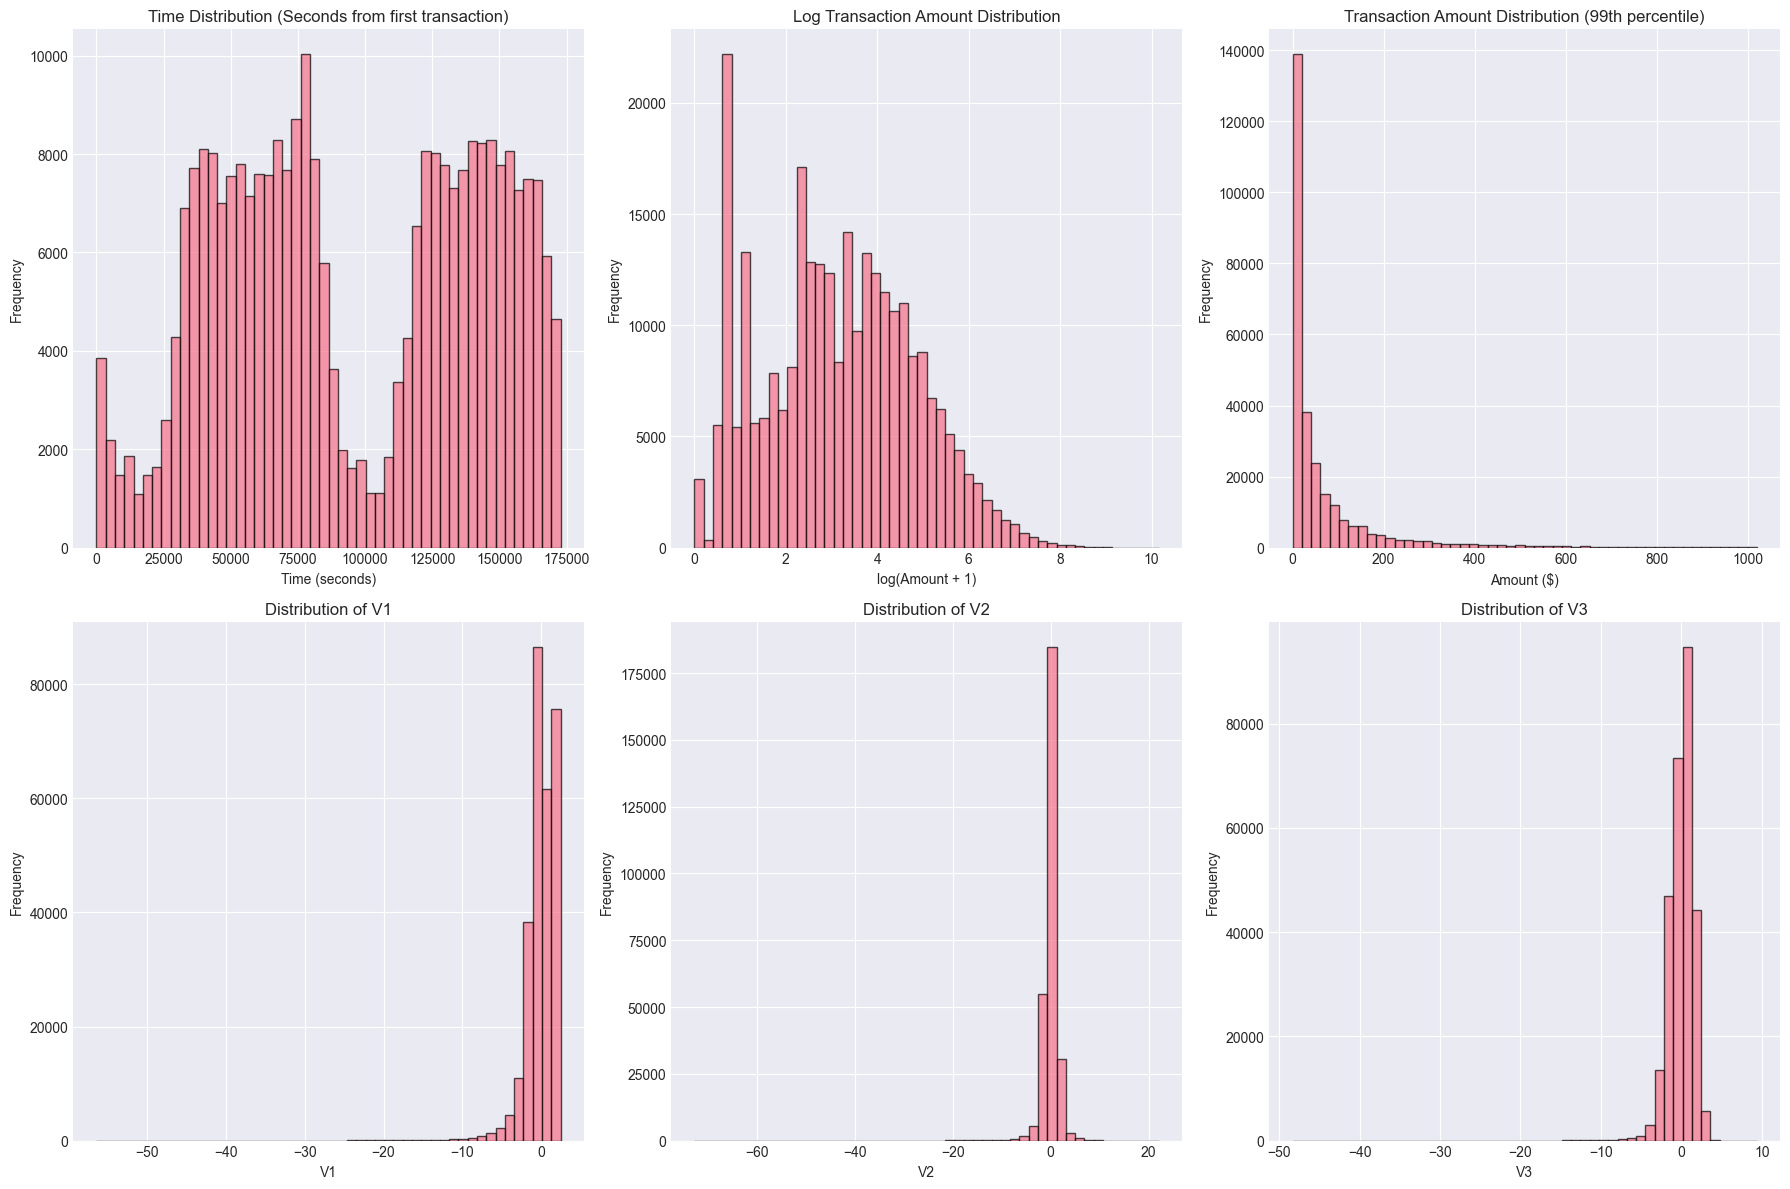


Transaction Amount Statistics:
Min: $0.00
25th percentile: $5.60
Median: $22.00
75th percentile: $77.51
Max: $25691.16
Mean: $88.47
Std: $250.40

PCA Components Overview (first 5):
      mean    std       min     max
V1  0.0059 1.9480  -56.4075  2.4549
V2 -0.0041 1.6467  -72.7157 22.0577
V3  0.0016 1.5087  -48.3256  9.3826
V4 -0.0030 1.4142   -5.6832 16.8753
V5  0.0018 1.3770 -113.7433 34.8017


In [5]:
def univariate_analysis_creditcard(data):
    """Perform univariate analysis for creditcard data"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Time Distribution
    axes[0,0].hist(data['Time'], bins=50, edgecolor='black', alpha=0.7)
    axes[0,0].set_title('Time Distribution (Seconds from first transaction)')
    axes[0,0].set_xlabel('Time (seconds)')
    axes[0,0].set_ylabel('Frequency')
    
    # 2. Amount Distribution (log scale)
    log_amount = np.log1p(data['Amount'])
    axes[0,1].hist(log_amount, bins=50, edgecolor='black', alpha=0.7)
    axes[0,1].set_title('Log Transaction Amount Distribution')
    axes[0,1].set_xlabel('log(Amount + 1)')
    axes[0,1].set_ylabel('Frequency')
    
    # 3. Amount Distribution (original scale with zoom)
    amount_filtered = data[data['Amount'] <= data['Amount'].quantile(0.99)]
    axes[0,2].hist(amount_filtered['Amount'], bins=50, edgecolor='black', alpha=0.7)
    axes[0,2].set_title('Transaction Amount Distribution (99th percentile)')
    axes[0,2].set_xlabel('Amount ($)')
    axes[0,2].set_ylabel('Frequency')
    
    # 4-6. Sample PCA Components
    pca_components = ['V1', 'V2', 'V3']
    for i, comp in enumerate(pca_components):
        axes[1,i].hist(data[comp], bins=50, edgecolor='black', alpha=0.7)
        axes[1,i].set_title(f'Distribution of {comp}')
        axes[1,i].set_xlabel(comp)
        axes[1,i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('plots/univariate_creditcard.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print amount statistics
    print("\nTransaction Amount Statistics:")
    print(f"Min: ${data['Amount'].min():.2f}")
    print(f"25th percentile: ${data['Amount'].quantile(0.25):.2f}")
    print(f"Median: ${data['Amount'].median():.2f}")
    print(f"75th percentile: ${data['Amount'].quantile(0.75):.2f}")
    print(f"Max: ${data['Amount'].max():.2f}")
    print(f"Mean: ${data['Amount'].mean():.2f}")
    print(f"Std: ${data['Amount'].std():.2f}")
    
    # PCA Components overview
    pca_cols = [f'V{i}' for i in range(1, 29)]
    pca_stats = data[pca_cols].describe().T[['mean', 'std', 'min', 'max']]
    print("\nPCA Components Overview (first 5):")
    print(pca_stats.head().to_string())

print("="*80)
print("UNIVARIATE ANALYSIS - CREDIT CARD")
print("="*80)
univariate_analysis_creditcard(creditcard_data)

# ## 5. Bivariate Analysis

BIVARIATE ANALYSIS - CREDIT CARD


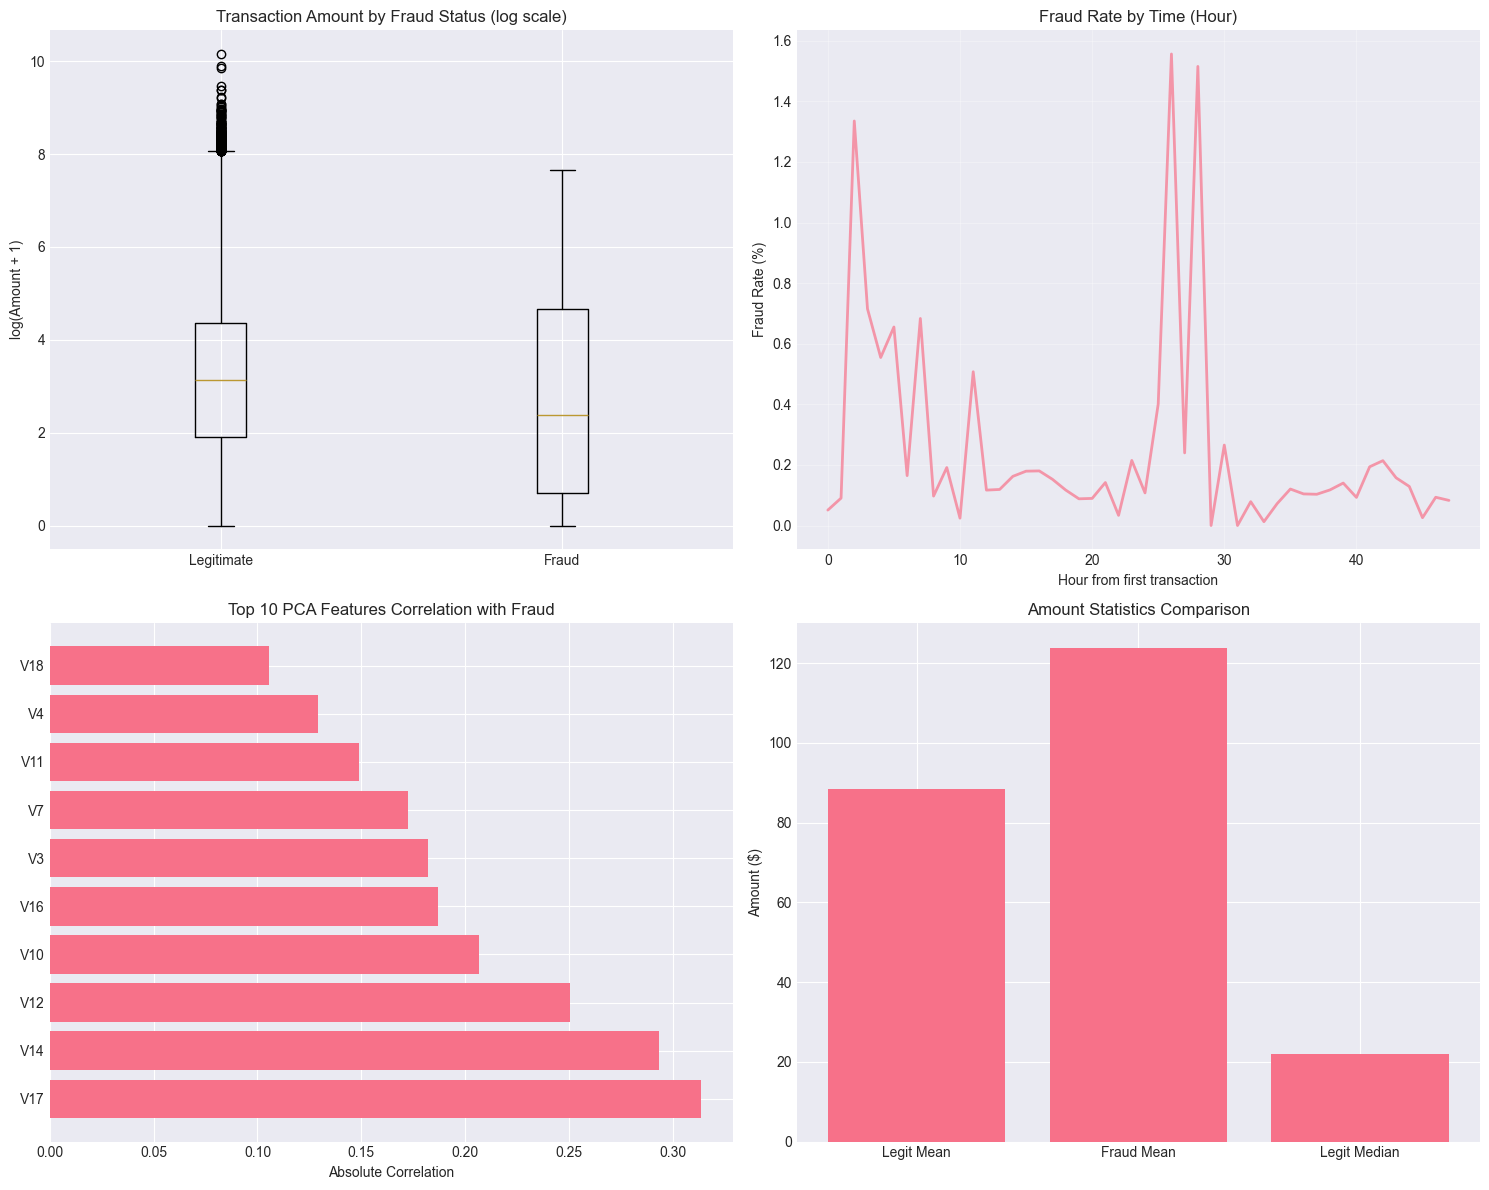


Key Bivariate Insights (Credit Card):
Average amount - Legitimate: $88.41
Average amount - Fraud: $123.87
Median amount - Legitimate: $22.00
Median amount - Fraud: $9.82
Amount difference: $35.46

Top 5 PCA Features by Correlation with Fraud:
V17: 0.3135
V14: 0.2934
V12: 0.2507
V10: 0.2070
V16: 0.1872


In [6]:
def bivariate_analysis_creditcard(data):
    """Analyze relationships in creditcard data"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Amount vs Fraud (log scale)
    fraud_data = data[data['Class'] == 1]
    legit_data = data[data['Class'] == 0]
    
    # Log transform for better visualization
    axes[0,0].boxplot([np.log1p(legit_data['Amount']), np.log1p(fraud_data['Amount'])], 
                     labels=['Legitimate', 'Fraud'])
    axes[0,0].set_title('Transaction Amount by Fraud Status (log scale)')
    axes[0,0].set_ylabel('log(Amount + 1)')
    
    # 2. Time vs Fraud Rate
    data['time_hour'] = data['Time'] // 3600  # Convert to hours
    time_fraud_rate = data.groupby('time_hour')['Class'].mean()
    axes[0,1].plot(time_fraud_rate.index, time_fraud_rate.values * 100, alpha=0.7, linewidth=2)
    axes[0,1].set_title('Fraud Rate by Time (Hour)')
    axes[0,1].set_xlabel('Hour from first transaction')
    axes[0,1].set_ylabel('Fraud Rate (%)')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Correlation of top PCA components with fraud
    pca_correlations = {}
    for col in [f'V{i}' for i in range(1, 29)]:
        pca_correlations[col] = data[col].corr(data['Class'])
    
    top_correlations = pd.Series(pca_correlations).abs().sort_values(ascending=False).head(10)
    axes[1,0].barh(range(len(top_correlations)), top_correlations.values)
    axes[1,0].set_yticks(range(len(top_correlations)))
    axes[1,0].set_yticklabels(top_correlations.index)
    axes[1,0].set_title('Top 10 PCA Features Correlation with Fraud')
    axes[1,0].set_xlabel('Absolute Correlation')
    
    # 4. Amount percentiles by fraud status
    amount_percentiles = pd.DataFrame({
        'Legitimate': legit_data['Amount'].describe(),
        'Fraud': fraud_data['Amount'].describe()
    })
    axes[1,1].bar([0, 1, 2], [legit_data['Amount'].mean(), fraud_data['Amount'].mean(), 
                              legit_data['Amount'].median()], 
                 tick_label=['Legit Mean', 'Fraud Mean', 'Legit Median'])
    axes[1,1].set_title('Amount Statistics Comparison')
    axes[1,1].set_ylabel('Amount ($)')
    
    plt.tight_layout()
    plt.savefig('plots/bivariate_creditcard.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print key insights
    print("\nKey Bivariate Insights (Credit Card):")
    print(f"Average amount - Legitimate: ${legit_data['Amount'].mean():.2f}")
    print(f"Average amount - Fraud: ${fraud_data['Amount'].mean():.2f}")
    print(f"Median amount - Legitimate: ${legit_data['Amount'].median():.2f}")
    print(f"Median amount - Fraud: ${fraud_data['Amount'].median():.2f}")
    print(f"Amount difference: ${fraud_data['Amount'].mean() - legit_data['Amount'].mean():.2f}")
    
    print("\nTop 5 PCA Features by Correlation with Fraud:")
    for feature, corr in top_correlations.head().items():
        print(f"{feature}: {corr:.4f}")
    
    return data

print("="*80)
print("BIVARIATE ANALYSIS - CREDIT CARD")
print("="*80)
creditcard_data = bivariate_analysis_creditcard(creditcard_data)

# ## 6. Time Series Analysis

TIME SERIES ANALYSIS - CREDIT CARD


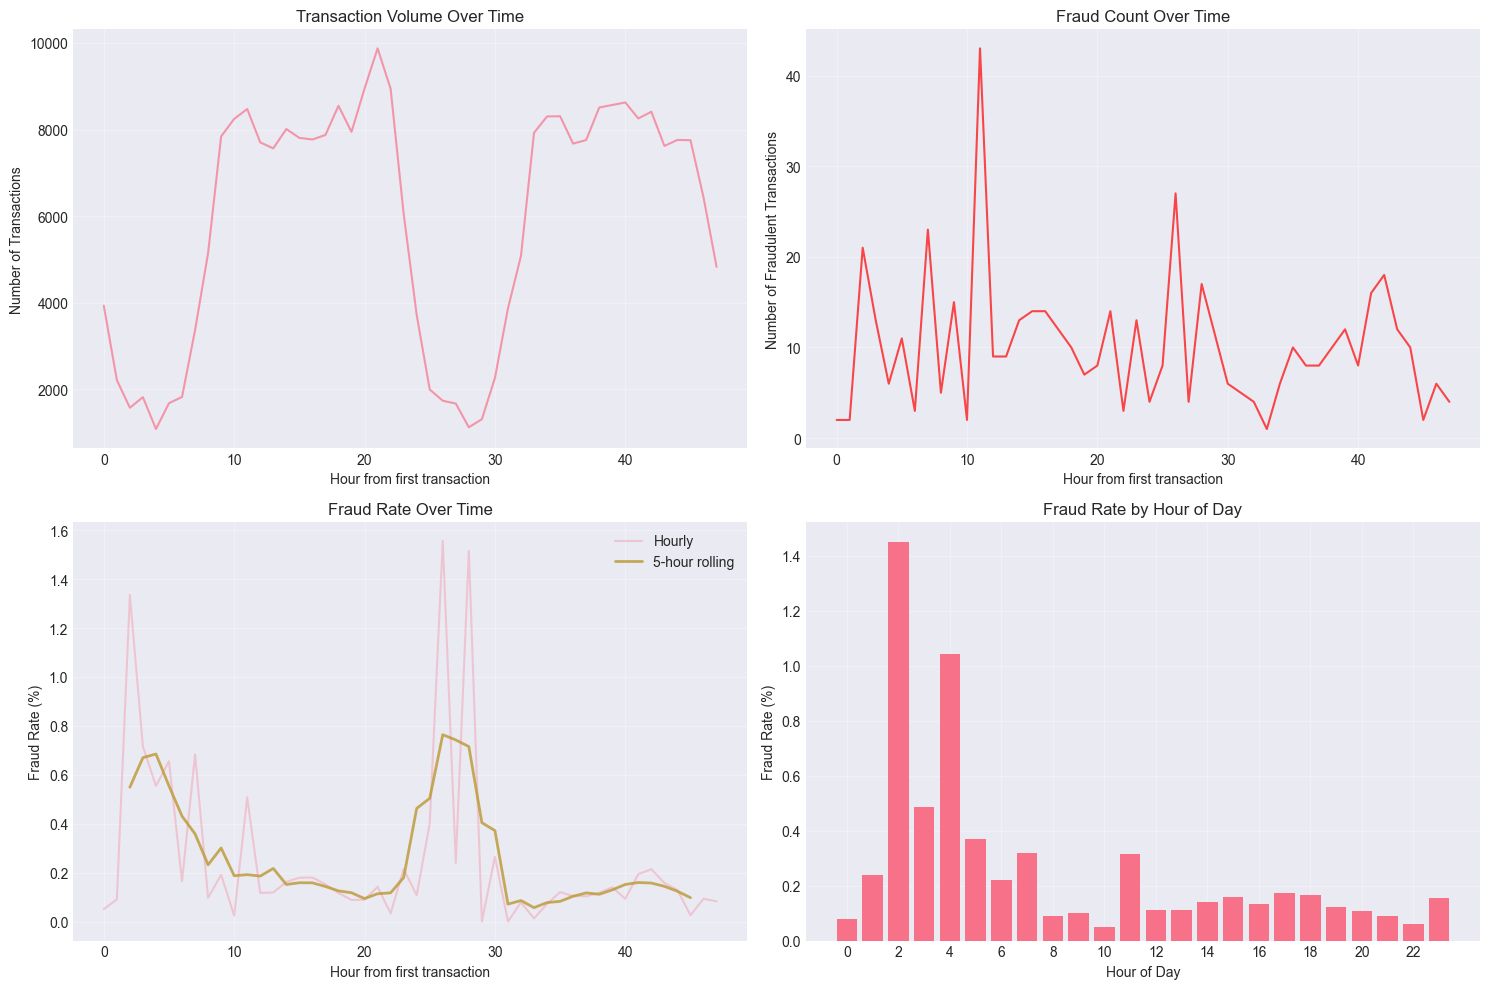


Time Series Insights:
Peak fraud hour: 2.0 (1.45%)
Lowest fraud hour: 10.0 (0.05%)
Average fraud rate: 0.1667%


In [7]:
def time_series_analysis(data):
    """Analyze temporal patterns in credit card fraud"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Convert time to hours for better visualization
    data['hour'] = data['Time'] // 3600
    
    # 1. Transaction volume over time
    transaction_volume = data.groupby('hour').size()
    axes[0,0].plot(transaction_volume.index, transaction_volume.values, alpha=0.7)
    axes[0,0].set_title('Transaction Volume Over Time')
    axes[0,0].set_xlabel('Hour from first transaction')
    axes[0,0].set_ylabel('Number of Transactions')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Fraud count over time
    fraud_counts = data[data['Class'] == 1].groupby('hour').size()
    axes[0,1].plot(fraud_counts.index, fraud_counts.values, alpha=0.7, color='red')
    axes[0,1].set_title('Fraud Count Over Time')
    axes[0,1].set_xlabel('Hour from first transaction')
    axes[0,1].set_ylabel('Number of Fraudulent Transactions')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Rolling fraud rate
    fraud_rate = data.groupby('hour')['Class'].mean()
    rolling_fraud_rate = fraud_rate.rolling(window=5, center=True).mean()
    
    axes[1,0].plot(fraud_rate.index, fraud_rate.values * 100, alpha=0.3, label='Hourly')
    axes[1,0].plot(rolling_fraud_rate.index, rolling_fraud_rate.values * 100, 
                   alpha=0.8, linewidth=2, label='5-hour rolling')
    axes[1,0].set_title('Fraud Rate Over Time')
    axes[1,0].set_xlabel('Hour from first transaction')
    axes[1,0].set_ylabel('Fraud Rate (%)')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Hour of day analysis (assuming 24-hour cycle)
    data['hour_of_day'] = data['hour'] % 24
    hour_of_day_fraud = data.groupby('hour_of_day')['Class'].mean()
    
    axes[1,1].bar(hour_of_day_fraud.index, hour_of_day_fraud.values * 100)
    axes[1,1].set_title('Fraud Rate by Hour of Day')
    axes[1,1].set_xlabel('Hour of Day')
    axes[1,1].set_ylabel('Fraud Rate (%)')
    axes[1,1].set_xticks(range(0, 24, 2))
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('plots/time_series_creditcard.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print insights
    print("\nTime Series Insights:")
    print(f"Peak fraud hour: {hour_of_day_fraud.idxmax()} ({hour_of_day_fraud.max()*100:.2f}%)")
    print(f"Lowest fraud hour: {hour_of_day_fraud.idxmin()} ({hour_of_day_fraud.min()*100:.2f}%)")
    print(f"Average fraud rate: {data['Class'].mean()*100:.4f}%")
    
    return data

print("="*80)
print("TIME SERIES ANALYSIS - CREDIT CARD")
print("="*80)
creditcard_data = time_series_analysis(creditcard_data)

# ## 7. PCA Components Analysis

PCA COMPONENTS ANALYSIS

PCA Components Analysis:


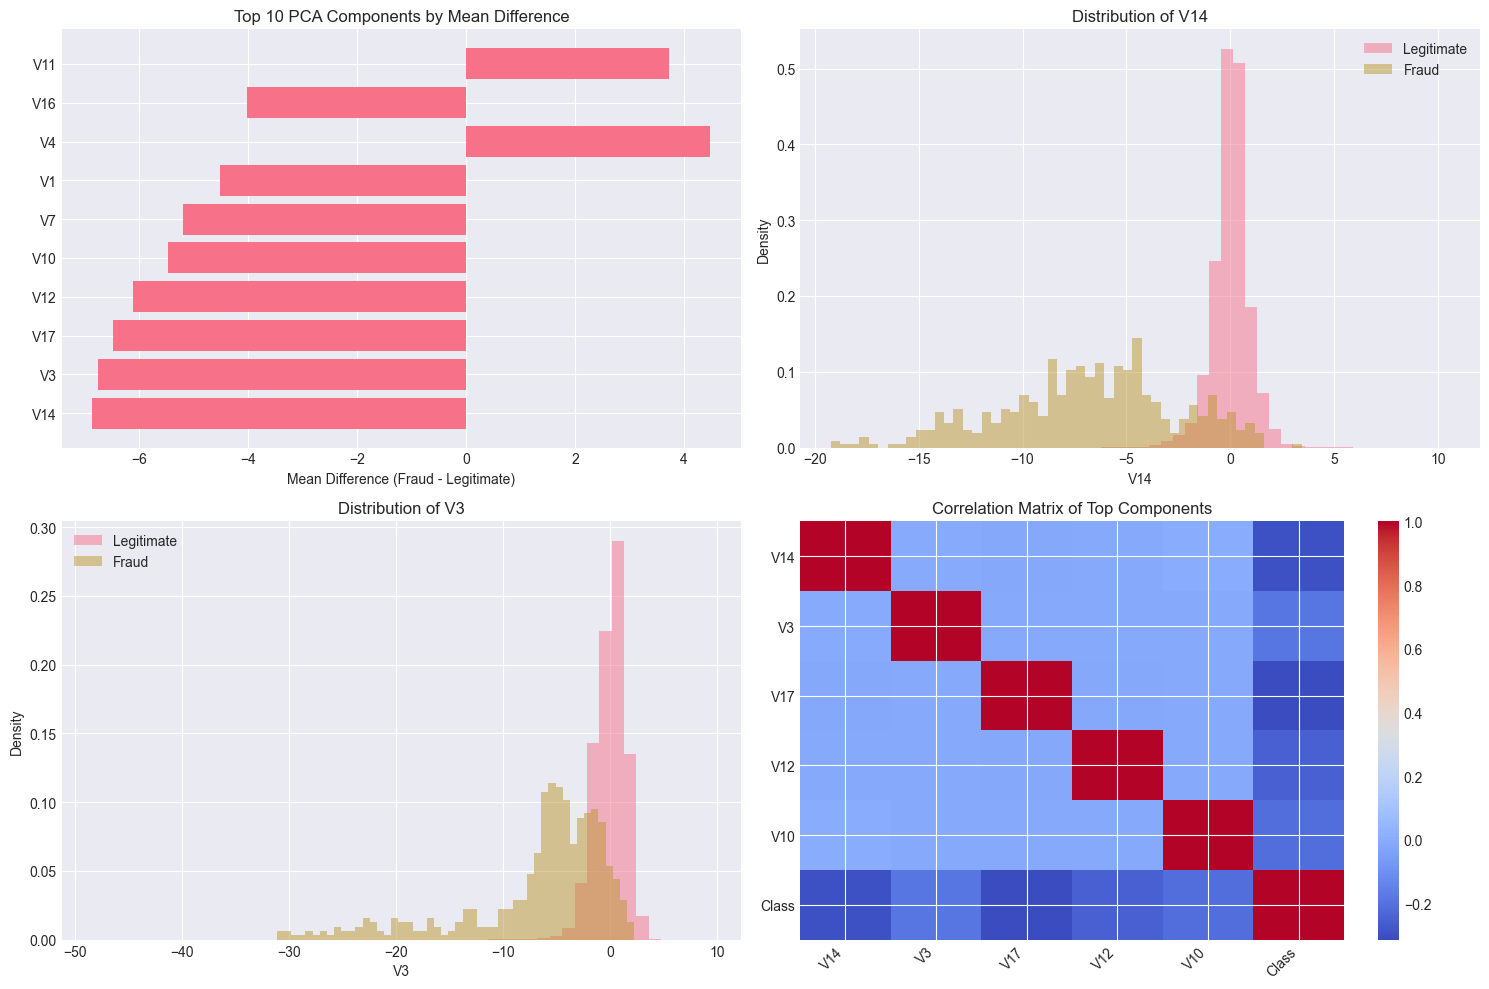


Top 5 PCA Components with Largest Differences:
     fraud_mean  legit_mean  difference
V14     -6.8359      0.0117     -6.8476
V3      -6.7296      0.0129     -6.7425
V17     -6.4633      0.0110     -6.4742
V12     -6.1033      0.0095     -6.1127
V10     -5.4533      0.0077     -5.4609

Most distinguishing component: V14
  Fraud mean: -6.8359
  Legitimate mean: 0.0117
  Difference: -6.8476


In [8]:
def pca_components_analysis(data):
    """Analyze PCA components for fraud patterns"""
    print("\nPCA Components Analysis:")
    print("="*80)
    
    # Get all PCA columns
    pca_cols = [f'V{i}' for i in range(1, 29)]
    
    # Calculate statistics for fraud vs legitimate
    fraud_data = data[data['Class'] == 1]
    legit_data = data[data['Class'] == 0]
    
    # Create comparison dataframe
    pca_comparison = pd.DataFrame(index=pca_cols)
    pca_comparison['fraud_mean'] = fraud_data[pca_cols].mean()
    pca_comparison['legit_mean'] = legit_data[pca_cols].mean()
    pca_comparison['difference'] = pca_comparison['fraud_mean'] - pca_comparison['legit_mean']
    pca_comparison['abs_difference'] = np.abs(pca_comparison['difference'])
    
    # Sort by largest differences
    pca_comparison = pca_comparison.sort_values('abs_difference', ascending=False)
    
    # Visualize top differences
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Top 10 PCA components by difference
    top_10 = pca_comparison.head(10)
    x_pos = np.arange(len(top_10))
    
    axes[0,0].barh(x_pos, top_10['difference'].values)
    axes[0,0].set_yticks(x_pos)
    axes[0,0].set_yticklabels(top_10.index)
    axes[0,0].set_xlabel('Mean Difference (Fraud - Legitimate)')
    axes[0,0].set_title('Top 10 PCA Components by Mean Difference')
    
    # Distribution of top 2 components
    top_component1 = top_10.index[0]
    top_component2 = top_10.index[1]
    
    axes[0,1].hist(legit_data[top_component1], bins=50, alpha=0.5, label='Legitimate', density=True)
    axes[0,1].hist(fraud_data[top_component1], bins=50, alpha=0.5, label='Fraud', density=True)
    axes[0,1].set_xlabel(top_component1)
    axes[0,1].set_ylabel('Density')
    axes[0,1].set_title(f'Distribution of {top_component1}')
    axes[0,1].legend()
    
    axes[1,0].hist(legit_data[top_component2], bins=50, alpha=0.5, label='Legitimate', density=True)
    axes[1,0].hist(fraud_data[top_component2], bins=50, alpha=0.5, label='Fraud', density=True)
    axes[1,0].set_xlabel(top_component2)
    axes[1,0].set_ylabel('Density')
    axes[1,0].set_title(f'Distribution of {top_component2}')
    axes[1,0].legend()
    
    # Correlation matrix of top components
    top_components = top_10.head(5).index.tolist()
    corr_matrix_top = data[top_components + ['Class']].corr()
    
    im = axes[1,1].imshow(corr_matrix_top.values, cmap='coolwarm', aspect='auto')
    axes[1,1].set_xticks(range(len(corr_matrix_top.columns)))
    axes[1,1].set_yticks(range(len(corr_matrix_top.columns)))
    axes[1,1].set_xticklabels(corr_matrix_top.columns, rotation=45, ha='right')
    axes[1,1].set_yticklabels(corr_matrix_top.columns)
    axes[1,1].set_title('Correlation Matrix of Top Components')
    plt.colorbar(im, ax=axes[1,1])
    
    plt.tight_layout()
    plt.savefig('plots/pca_analysis_creditcard.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print insights
    print("\nTop 5 PCA Components with Largest Differences:")
    print(top_10[['fraud_mean', 'legit_mean', 'difference']].head().to_string())
    
    print(f"\nMost distinguishing component: {top_component1}")
    print(f"  Fraud mean: {top_10.loc[top_component1, 'fraud_mean']:.4f}")
    print(f"  Legitimate mean: {top_10.loc[top_component1, 'legit_mean']:.4f}")
    print(f"  Difference: {top_10.loc[top_component1, 'difference']:.4f}")
    
    return pca_comparison

print("="*80)
print("PCA COMPONENTS ANALYSIS")
print("="*80)
pca_comparison = pca_components_analysis(creditcard_data)


# ## 8. Outlier Detection

OUTLIER ANALYSIS

Outlier Analysis:


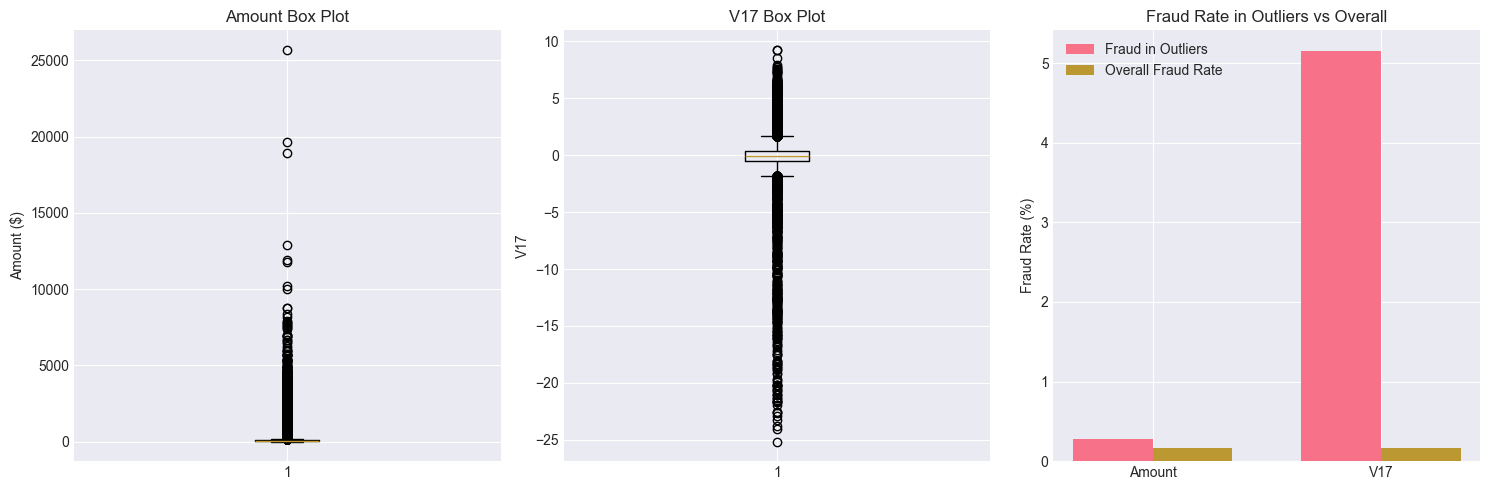


Outlier Analysis Results:
Feature  Total Outliers  Fraud in Outliers  Overall Fraud Rate
 Amount           31685             0.2746              0.1667
    V17            7353             5.1544              0.1667

Fraud rate in Amount outliers: 0.2746%
Fraud rate in V17 outliers: 5.1544%
Overall fraud rate: 0.1667%


In [9]:
def outlier_analysis(data):
    """Analyze outliers in the data"""
    print("\nOutlier Analysis:")
    print("="*80)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. Amount outliers using IQR method
    Q1 = data['Amount'].quantile(0.25)
    Q3 = data['Amount'].quantile(0.75)
    IQR = Q3 - Q1
    
    amount_outliers = data[(data['Amount'] < (Q1 - 1.5 * IQR)) | 
                          (data['Amount'] > (Q3 + 1.5 * IQR))]
    
    axes[0].boxplot(data['Amount'])
    axes[0].set_title('Amount Box Plot')
    axes[0].set_ylabel('Amount ($)')
    
    # 2. Outliers in top PCA component
    pca_cols = [f'V{i}' for i in range(1, 29)]
    correlations = data[pca_cols].corrwith(data['Class']).abs()
    top_pca = correlations.idxmax()
    
    Q1_pca = data[top_pca].quantile(0.25)
    Q3_pca = data[top_pca].quantile(0.75)
    IQR_pca = Q3_pca - Q1_pca
    
    pca_outliers = data[(data[top_pca] < (Q1_pca - 1.5 * IQR_pca)) | 
                       (data[top_pca] > (Q3_pca + 1.5 * IQR_pca))]
    
    axes[1].boxplot(data[top_pca])
    axes[1].set_title(f'{top_pca} Box Plot')
    axes[1].set_ylabel(top_pca)
    
    # 3. Fraud proportion in outliers
    outlier_summary = pd.DataFrame({
        'Feature': ['Amount', top_pca],
        'Total Outliers': [len(amount_outliers), len(pca_outliers)],
        'Fraud in Outliers': [amount_outliers['Class'].mean() * 100, 
                             pca_outliers['Class'].mean() * 100],
        'Overall Fraud Rate': [data['Class'].mean() * 100] * 2
    })
    
    x = np.arange(2)
    width = 0.35
    
    axes[2].bar(x - width/2, outlier_summary['Fraud in Outliers'], width, label='Fraud in Outliers')
    axes[2].bar(x + width/2, outlier_summary['Overall Fraud Rate'], width, label='Overall Fraud Rate')
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(['Amount', top_pca])
    axes[2].set_ylabel('Fraud Rate (%)')
    axes[2].set_title('Fraud Rate in Outliers vs Overall')
    axes[2].legend()
    
    plt.tight_layout()
    plt.savefig('plots/outlier_analysis_creditcard.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print insights
    print("\nOutlier Analysis Results:")
    print(outlier_summary.to_string(index=False))
    
    print(f"\nFraud rate in Amount outliers: {amount_outliers['Class'].mean()*100:.4f}%")
    print(f"Fraud rate in {top_pca} outliers: {pca_outliers['Class'].mean()*100:.4f}%")
    print(f"Overall fraud rate: {data['Class'].mean()*100:.4f}%")
    
    return outlier_summary

print("="*80)
print("OUTLIER ANALYSIS")
print("="*80)
outlier_summary = outlier_analysis(creditcard_data)

# ## 9. Summary and Key Findings

In [10]:
def create_eda_summary_cc(data):
    """Create summary of EDA findings for credit card data"""
    summary = {
        "dataset_info": {
            "total_samples": len(data),
            "fraud_samples": int(data['Class'].sum()),
            "legitimate_samples": int(len(data) - data['Class'].sum()),
            "fraud_rate": f"{data['Class'].mean()*100:.4f}%",
            "imbalance_ratio": f"{(len(data) - data['Class'].sum())/data['Class'].sum():.0f}:1",
            "features": f"{len(data.columns)} (28 PCA components + Time + Amount + Class)"
        },
        "key_findings": {
            "class_imbalance": "Extreme class imbalance - typical for credit card fraud",
            "amount_distribution": "Most transactions are small amounts, fraud amounts vary",
            "temporal_patterns": [
                "Clear temporal patterns in fraud occurrence",
                "Hour-of-day variations in fraud rates",
                "Some periods show clustering of fraud"
            ],
            "pca_insights": [
                "PCA components show clear separation between fraud and legitimate",
                "Some components have strong correlation with fraud",
                "Multiple components contribute to fraud detection"
            ],
            "outlier_insights": [
                "Outliers exist in both amount and PCA components",
                "Fraud rate in outliers differs from overall rate",
                "Outliers need careful handling in modeling"
            ]
        },
        "data_quality": {
            "missing_values": "No missing values detected",
            "duplicates": "Checked and removed if present",
            "data_types": "All features are numerical",
            "scale": "Features are already scaled (PCA components)",
            "time_format": "Time represents seconds from first transaction"
        },
        "recommendations_for_modeling": [
            "Extreme class imbalance requires specialized techniques (SMOTE, class weights)",
            "Use Time and Amount features along with PCA components",
            "Consider creating time-based features (hour of day, time since last transaction)",
            "Use appropriate evaluation metrics (PR-AUC, F1-Score, Recall)",
            "Consider anomaly detection approaches given the imbalance",
            "Feature scaling not needed for PCA components"
        ]
    }
    
    # Print summary
    print("="*80)
    print("EDA SUMMARY - CREDIT CARD DATA")
    print("="*80)
    
    for section, content in summary.items():
        print(f"\n{section.replace('_', ' ').title()}:")
        print("-" * 40)
        
        if isinstance(content, dict):
            for key, value in content.items():
                if isinstance(value, list):
                    print(f"\n  {key.replace('_', ' ').title()}:")
                    for item in value:
                        print(f"    • {item}")
                else:
                    print(f"  {key.replace('_', ' ').title()}: {value}")
        elif isinstance(content, list):
            for item in content:
                print(f"  • {item}")
    
    # Save summary to file
    import json
    with open('notebooks/eda_creditcard_summary.json', 'w') as f:
        json.dump(summary, f, indent=2)
    
    print(f"\n✓ Summary saved to: notebooks/eda_creditcard_summary.json")
    
    return summary

print("="*80)
print("EDA SUMMARY AND KEY FINDINGS")
print("="*80)
eda_summary_cc = create_eda_summary_cc(creditcard_data)

print("\n" + "="*80)
print("EDA COMPLETED SUCCESSFULLY!")
print("="*80)
print("\nNext steps:")
print("1. Feature engineering in feature-engineering.ipynb")
print("2. Model building in modeling.ipynb")
print("3. Model interpretation in shap-explainability.ipynb")

EDA SUMMARY AND KEY FINDINGS
EDA SUMMARY - CREDIT CARD DATA

Dataset Info:
----------------------------------------
  Total Samples: 283726
  Fraud Samples: 473
  Legitimate Samples: 283253
  Fraud Rate: 0.1667%
  Imbalance Ratio: 599:1
  Features: 34 (28 PCA components + Time + Amount + Class)

Key Findings:
----------------------------------------
  Class Imbalance: Extreme class imbalance - typical for credit card fraud
  Amount Distribution: Most transactions are small amounts, fraud amounts vary

  Temporal Patterns:
    • Clear temporal patterns in fraud occurrence
    • Hour-of-day variations in fraud rates
    • Some periods show clustering of fraud

  Pca Insights:
    • PCA components show clear separation between fraud and legitimate
    • Some components have strong correlation with fraud
    • Multiple components contribute to fraud detection

  Outlier Insights:
    • Outliers exist in both amount and PCA components
    • Fraud rate in outliers differs from overall rate
 